In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
tablenames = engine.table_names()
tablenames

['measurement', 'station']

In [21]:
measurement = Base.classes.measurement
station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:

inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [89]:
# Find the most recent date in the data set.
firstdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
session.query(measurement.date).all()

firstdate = str(firstdate).strip("(',)")

firstdate = firstdate.split("-")

<AxesSubplot:xlabel='date'>

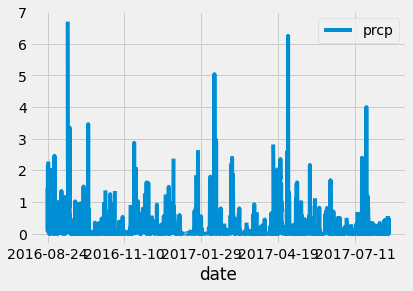

In [102]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
year_ago = dt.date(int(firstdate[0]),int(firstdate[1]),int(firstdate[2])) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
df = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > year_ago).order_by(measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(df).set_index('date')

# Sort the dataframe by date
df.sort_values(by='date',inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(kind='line')




In [87]:
# Use Pandas to calcualte the summary statistics for the precipitation data
firstdate

[('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02')]

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()